## Import packages

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

<br><br>

<!-- BEGIN QUESTION -->

## 1. Research Question <a name="1"></a>
<hr>



In this project, I will be working on a classification problem of predicting whether a credit card client will default or not. 
The dataset comes from [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled `default.payment.next.month` in the data. The rest of the columns can be used as features. 


The problem is predicting whether a client will default payment or not next month. This dataset contains 25 features and 30000 rows. Among the 25 features, many are very similar, recording same statistics only in different time period. All features are numeric while some are transformed from categorical variables. 

In [2]:
# read the data
data = pd.read_csv("data/UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.shape

(30000, 25)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>


Split the data into train (70%) and test (30%) portions

In [4]:
train, test = train_test_split(data, test_size = 0.3, random_state = 123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. Exploratory data analysis (EDA) <a name="3"></a>
<hr>


In [5]:
# EDA on training set
train.shape

(21000, 25)

In [6]:
train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

There are no missing values in the training set. Every feature is numeric, among which some are encoded from categorical variable.

In [8]:
# Visualize variance in each feature 
np.var(train, axis=0)

ID                            7.483164e+07
LIMIT_BAL                     1.695193e+10
SEX                           2.398470e-01
EDUCATION                     6.287573e-01
MARRIAGE                      2.721316e-01
AGE                           8.486876e+01
PAY_0                         1.255381e+00
PAY_2                         1.426776e+00
PAY_3                         1.430642e+00
PAY_4                         1.365458e+00
PAY_5                         1.293173e+00
PAY_6                         1.317824e+00
BILL_AMT1                     5.393785e+09
BILL_AMT2                     5.097722e+09
BILL_AMT3                     4.765709e+09
BILL_AMT4                     4.204454e+09
BILL_AMT5                     3.743695e+09
BILL_AMT6                     3.550524e+09
PAY_AMT1                      2.901175e+08
PAY_AMT2                      4.752798e+08
PAY_AMT3                      3.377347e+08
PAY_AMT4                      2.382012e+08
PAY_AMT5                      2.318868e+08
PAY_AMT6   

Some features have very high variance while other have very small variance. 

In [9]:
# Visualize range in each feature
np.max(train, axis = 0) - np.min(train, axis = 0)

ID                              29999.0
LIMIT_BAL                      990000.0
SEX                                 1.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                58.0
PAY_0                              10.0
PAY_2                              10.0
PAY_3                              10.0
PAY_4                              10.0
PAY_5                              10.0
PAY_6                              10.0
BILL_AMT1                      979819.0
BILL_AMT2                     1051457.0
BILL_AMT3                     1012350.0
BILL_AMT4                      942202.0
BILL_AMT5                      988543.0
BILL_AMT6                     1301267.0
PAY_AMT1                       873552.0
PAY_AMT2                      1227082.0
PAY_AMT3                       896040.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


In [10]:
# View the proportion of response variable
data["default.payment.next.month"].value_counts(normalize = True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

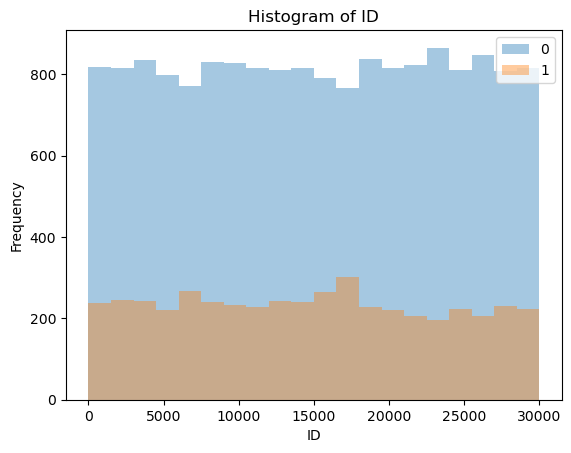

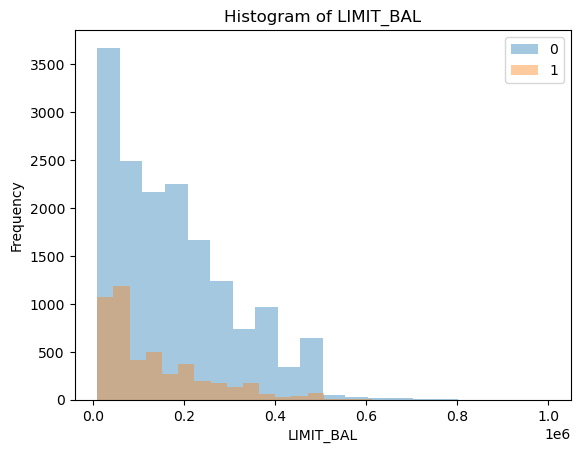

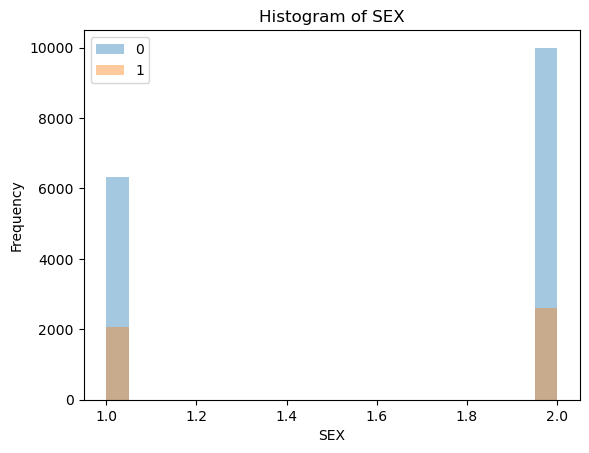

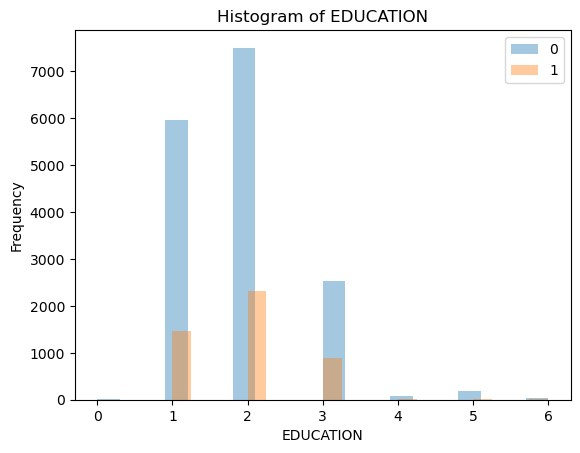

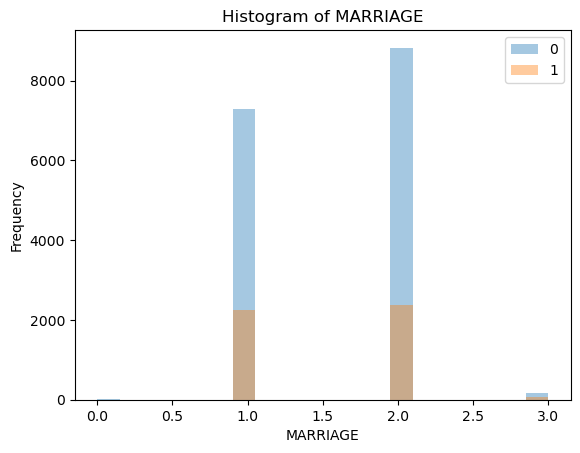

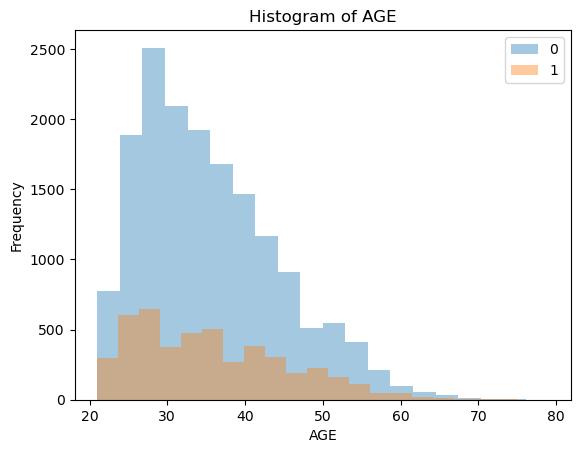

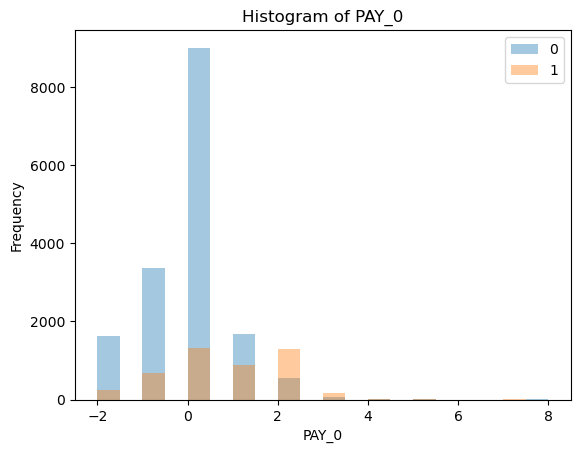

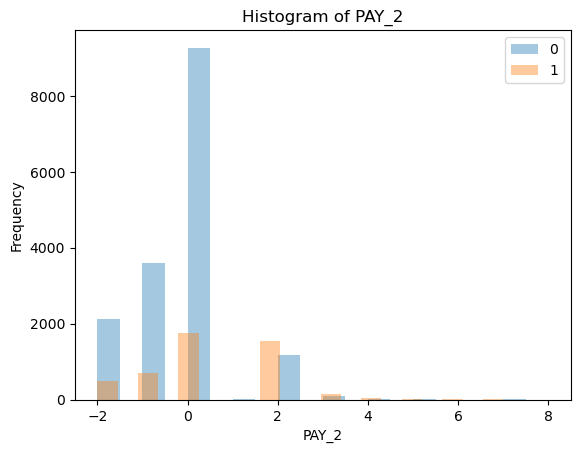

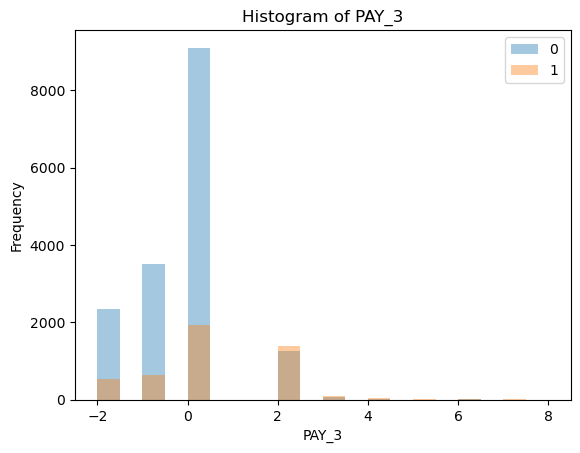

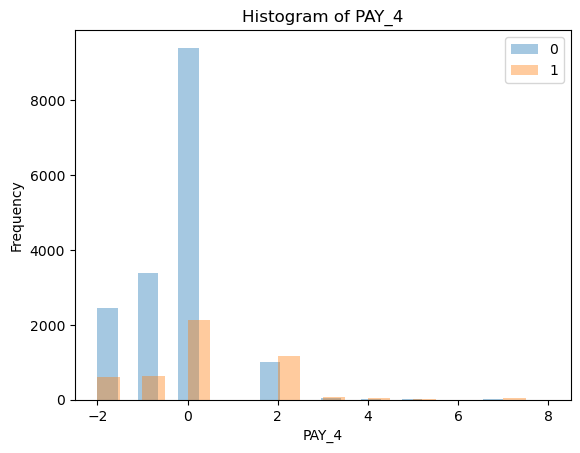

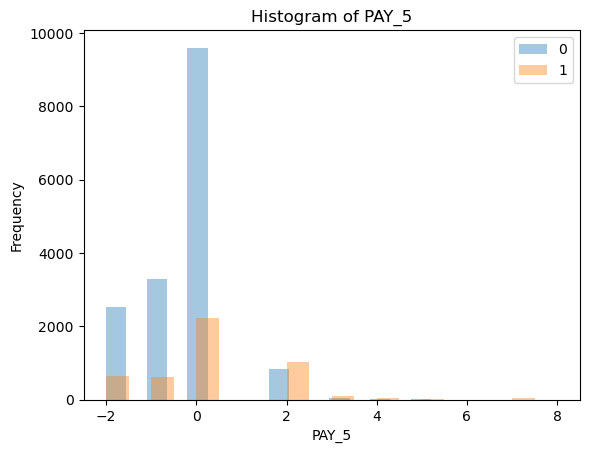

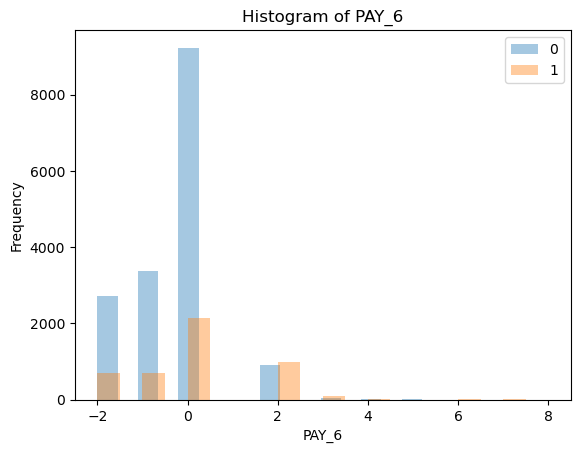

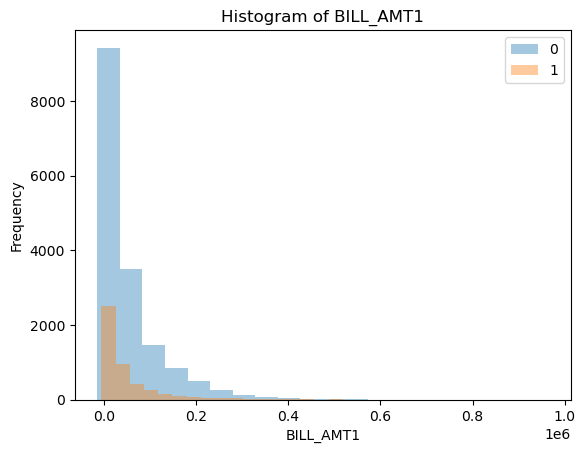

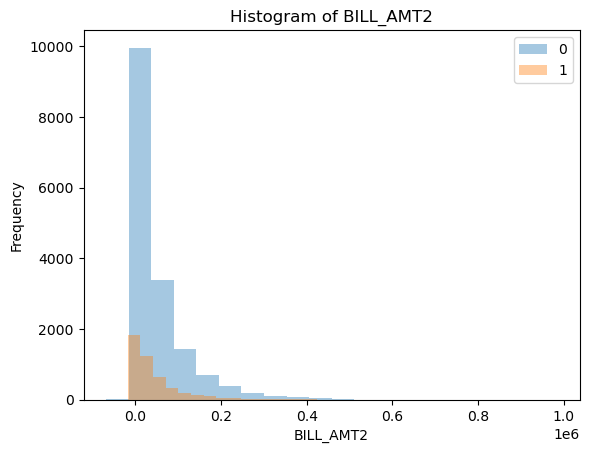

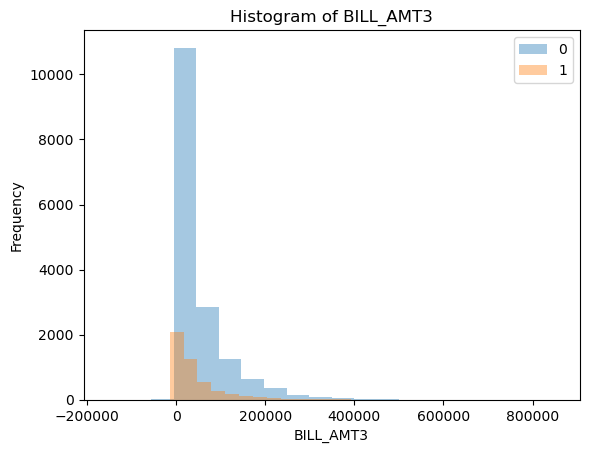

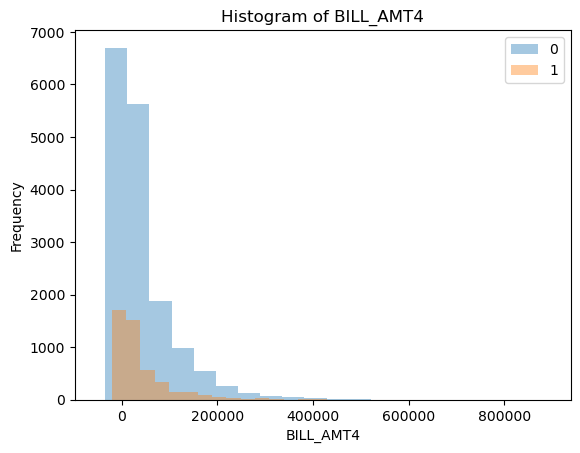

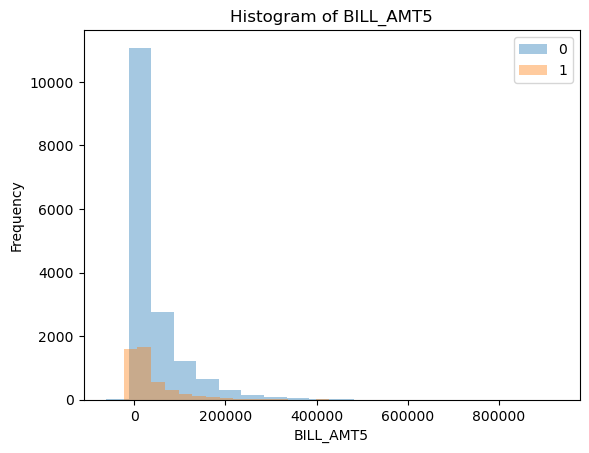

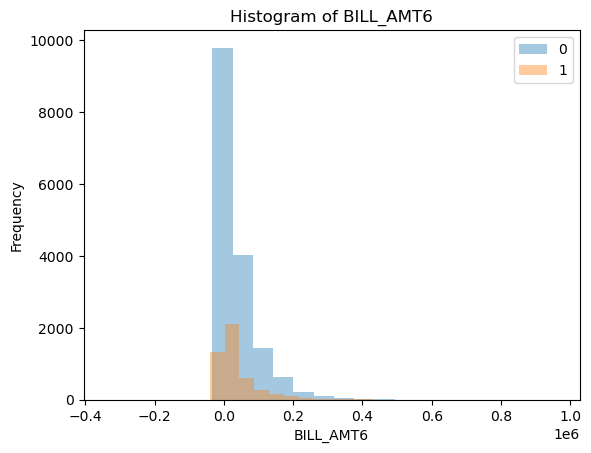

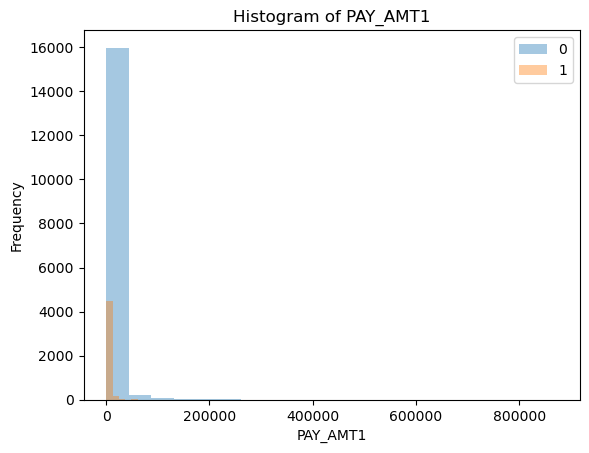

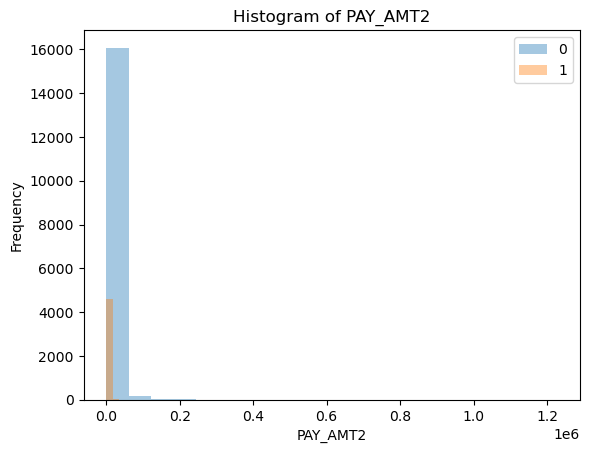

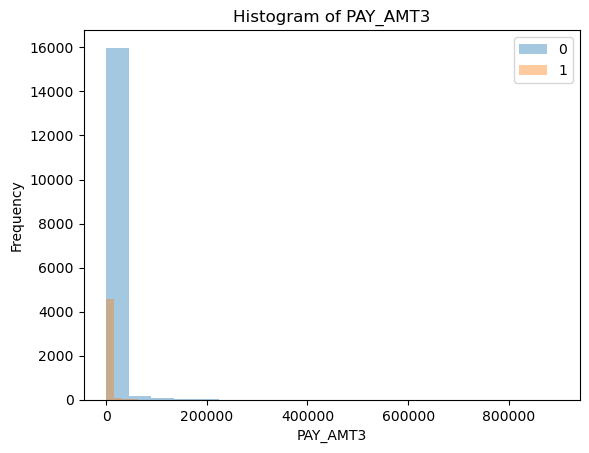

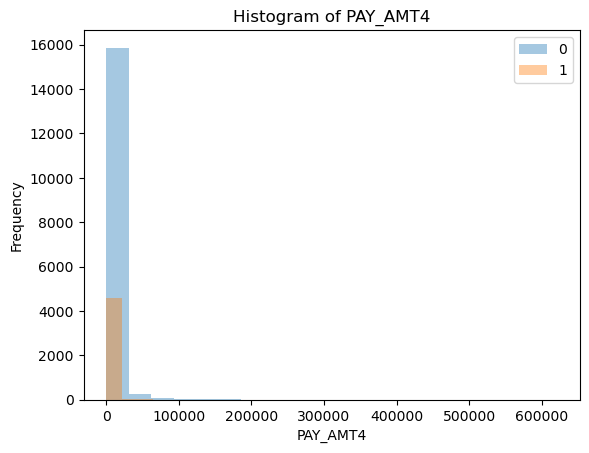

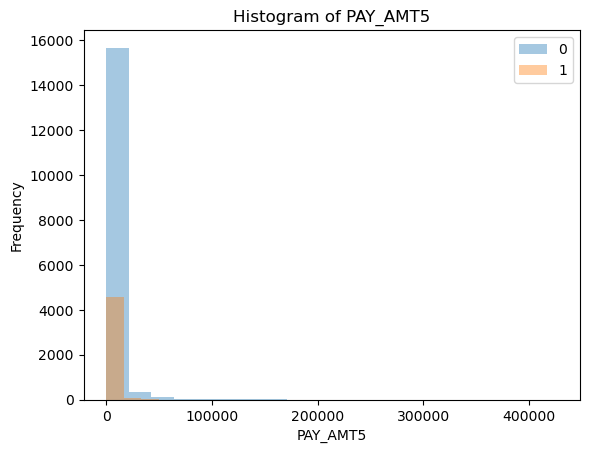

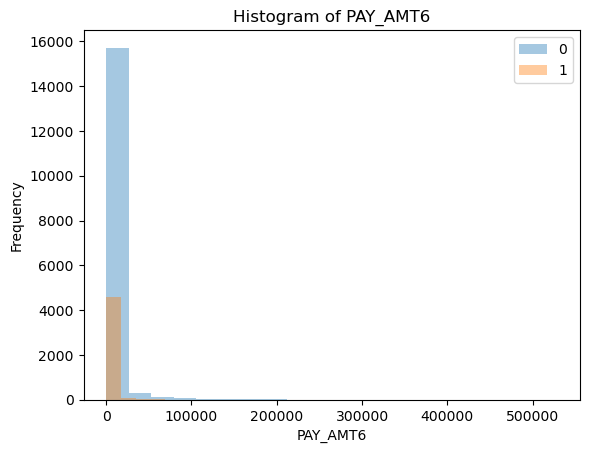

In [11]:
# Visualize distribution of levels in each feature
plot_data = train.drop(columns = 'default.payment.next.month')

cols = list(plot_data.columns)

for feat in cols:
    ax = train.groupby("default.payment.next.month")[feat].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()


For feature `ID`, the proportion of 1 and 0 are similar across different ID and similar to the proportion of 1 and 0 considering all examples. This indicates that `ID` may not influence the whether a client will default payment or not.   
For many features such as `PAY_AMT6`, `PAY_AMT5`, etc, there exists a few outliers.

<AxesSubplot: >

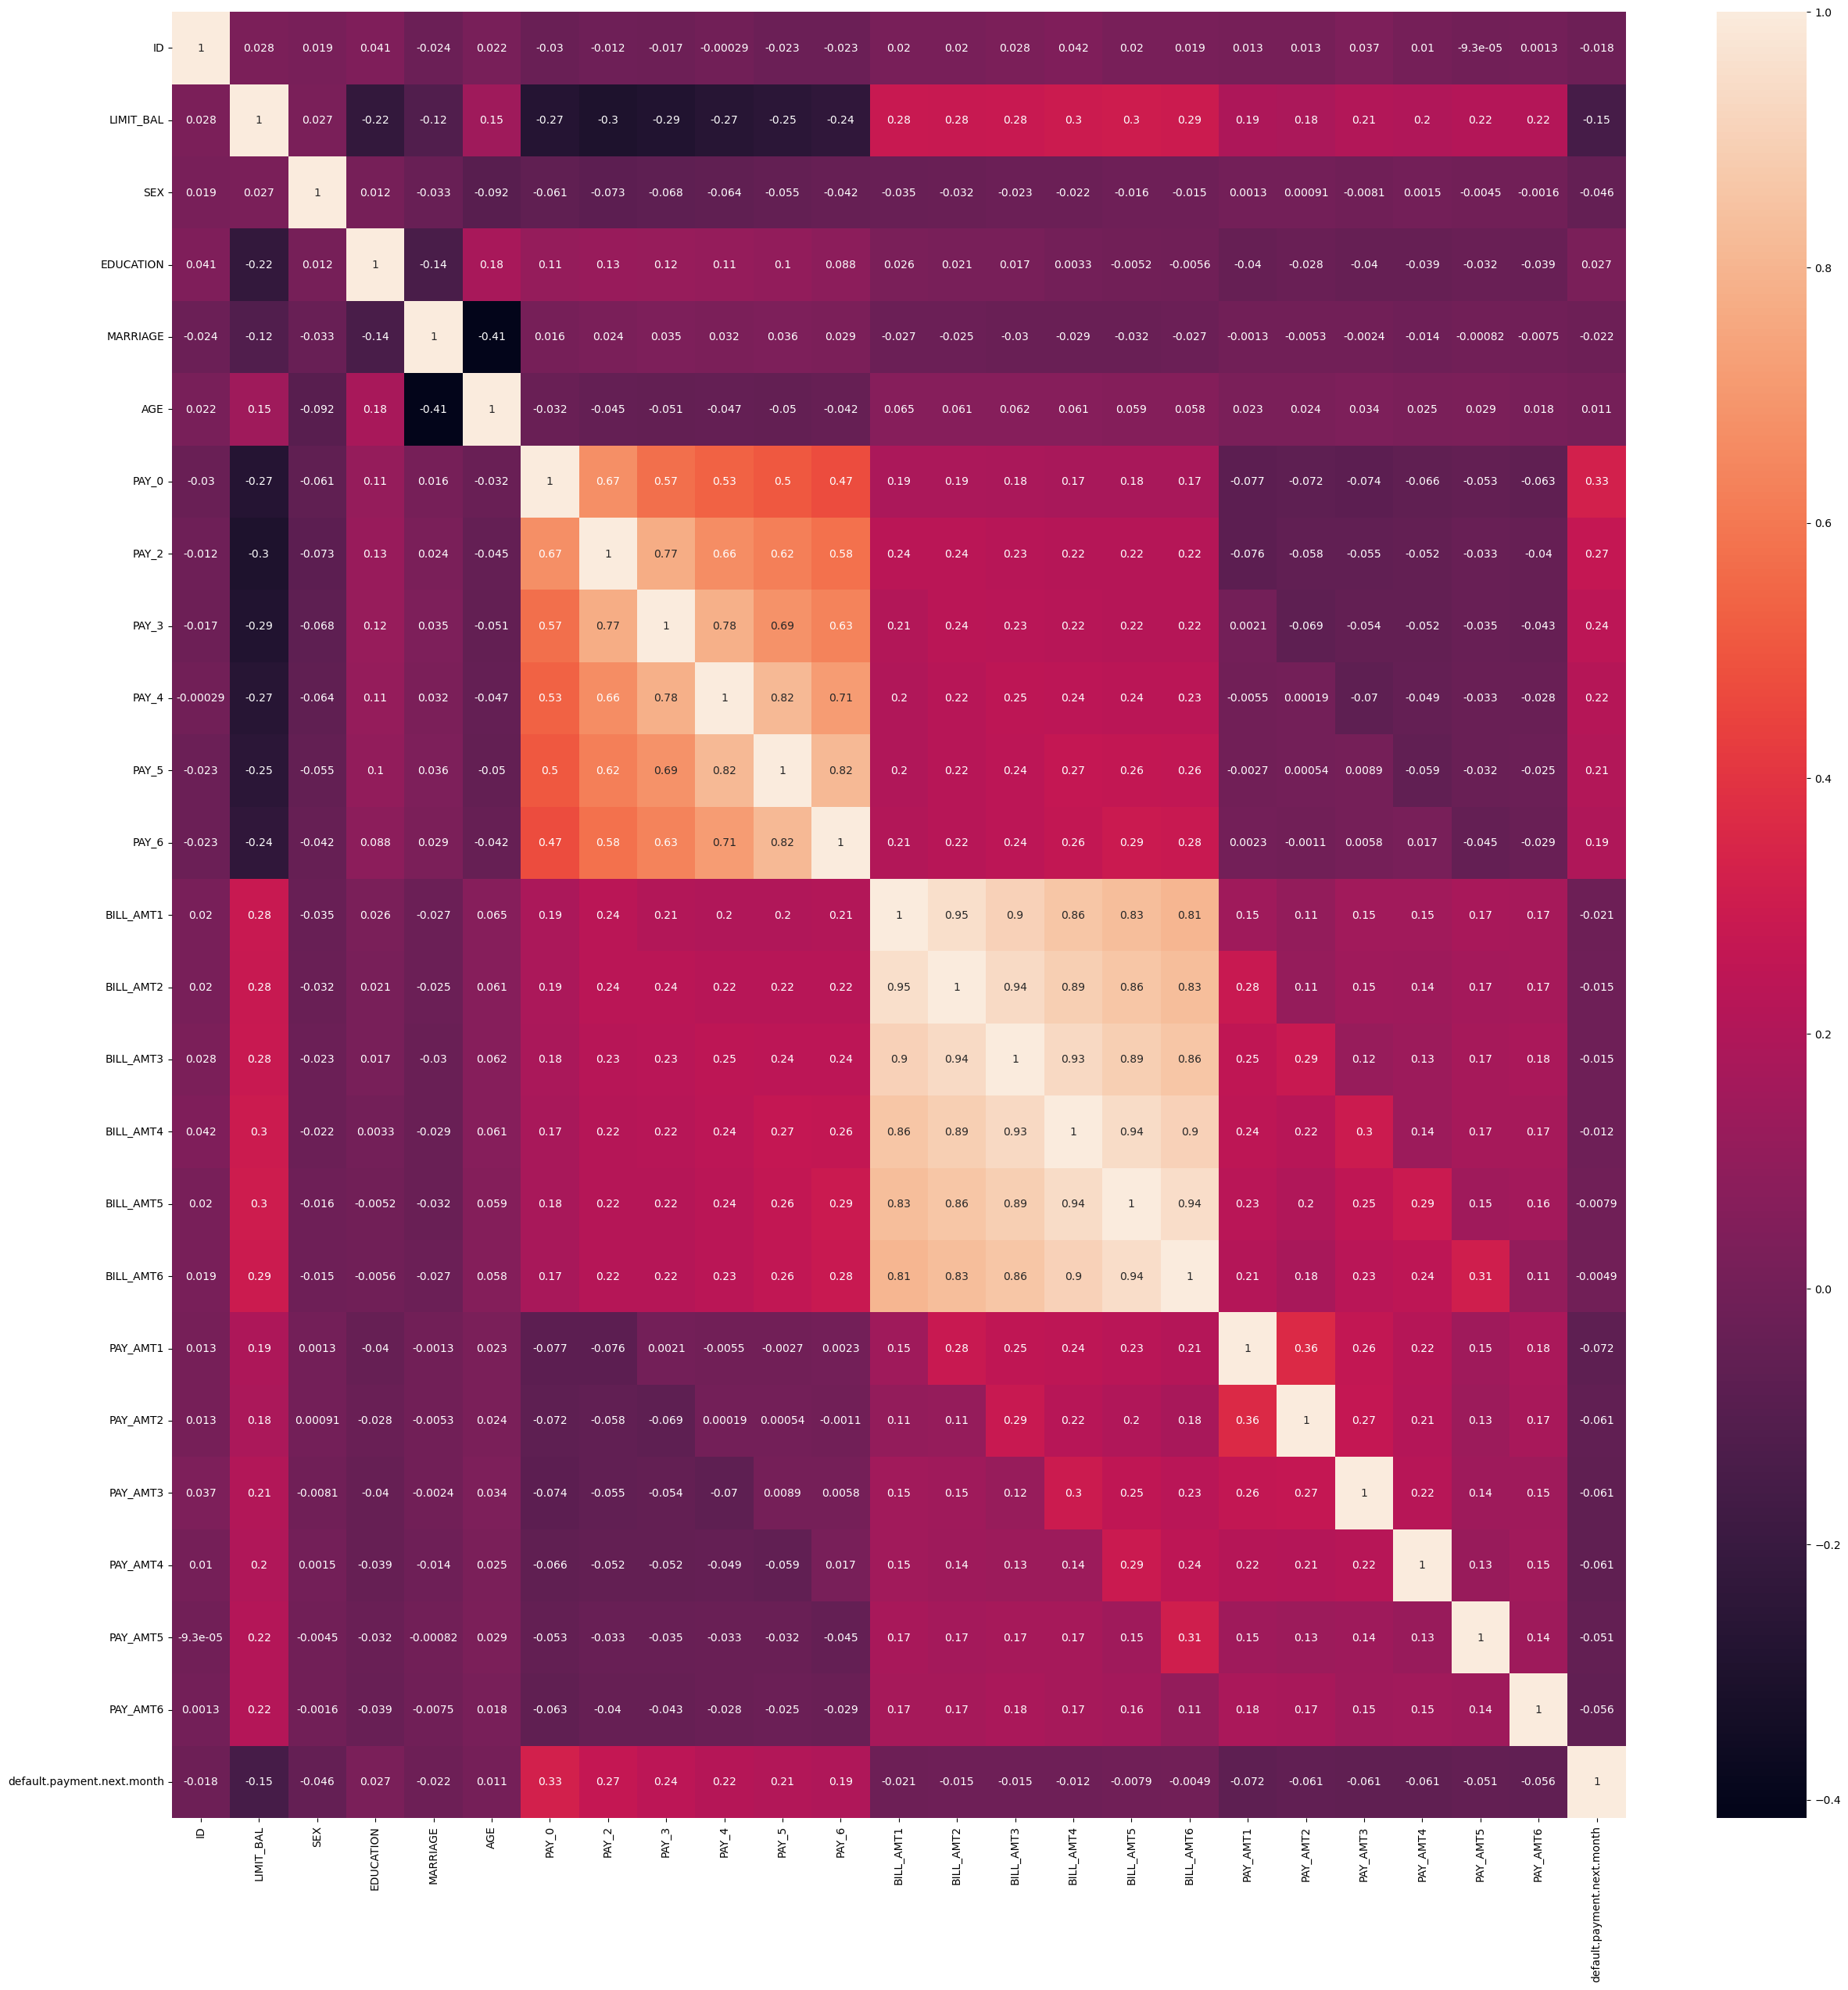

In [12]:
# Visualize correlation between the response and each feature
plt.figure(figsize=(30, 30))
sns.heatmap(train.corr(), annot=True)

There seems to be colinearity issues. `BILL_AMT1~6` are correlated with each other and `PAY_0~6` are correlated with each other.

### Assessment Metric

Here both classes are important so I decide to use f1-score which combines Recall and Precision. In addition, to give equal importance to each class, I decide to use macro average in f1-score

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

The 24 features contain different types, and many features in a certain type have different scale. So I create a preprocessor and apply several transformation by column transformer.

In [13]:
# Identify features types
drop_features = ["ID"]
numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6"
    
]
binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
target = "default.payment.next.month"

In [14]:
# Identify transformations and create the column transformer
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop = "if_binary"), binary_features),
    (OneHotEncoder(handle_unknown = "ignore"), categorical_features))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

Firstly, I decide to try out `scikit-learn`'s baseline model (dummy classifier model) and evaluate its performance.

In [15]:
X_train = train.drop(columns = "default.payment.next.month")
y_train = train["default.payment.next.month"]

dummy = DummyClassifier(strategy="stratified")

# Apply cross-validation to seek for model with best test performance 
results = cross_validate(
    dummy, X_train, y_train, return_train_score = True, scoring = "f1_macro"
)
pd.DataFrame(results)



,fit_time,score_time,test_score,train_score
0,0.001301,0.002268,0.505666,0.499952
1,0.001337,0.001116,0.499844,0.504817
2,0.001677,0.001430,0.509395,0.495154
3,0.001542,0.001315,0.512845,0.505182
4,0.001126,0.001046,0.495794,0.500645


Clearly, both train and test scores are bad, meaning that the baseline model does not work in this problem set. 

<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

Having examined the baseline model, I decide to continue with linear classification model -- logistic regression. In this section, beyond cross-validation, I also use hyper-parameter tuning to select appropriate model for the best performance.

In [16]:
pipe = make_pipeline(
    preprocessor, LogisticRegression(max_iter = 1000)
)

# Apply cross-validation to seek for model with best test performance 
results_lm = cross_validate(
    pipe, X_train, y_train, return_train_score = True, scoring = "f1_macro"
)
pd.DataFrame(results_lm)

,fit_time,score_time,test_score,train_score
0,0.190268,0.003707,0.632242,0.636547
1,0.125061,0.003836,0.630569,0.631603
2,0.144650,0.003652,0.628833,0.628102
3,0.141946,0.003673,0.633508,0.623047
4,0.137734,0.003687,0.617769,0.628692


In [17]:
# Using hyper-parameter tuning to find optimized performance model
from scipy.stats import loguniform

param_dist = {"logisticregression__C": loguniform(0.01, 100)}

random_search = RandomizedSearchCV(
    pipe,                                    
    param_distributions = param_dist, 
    n_iter = 50, 
    scoring = "f1_macro",
    n_jobs = -1, 
    return_train_score = True,
    random_state = 123)

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',...
                                                                               ['SEX']),
                                                                              ('onehotencoder-2',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['EDUCATION',
                                                                                'MARRIAGE'])])),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1225366b0>},
                   random_state=123, return_train_score=True,
                   scoring='f1_macro')

In [18]:
print("best score : ", random_search.best_score_)
print("best parameter", random_search.best_params_)

best score :  0.6290638253996693
best parameter {'logisticregression__C': 2.7803152557785}


In [19]:
pd.DataFrame(random_search.cv_results_)[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]




,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.629646,0.004498,0.628875,0.005076
1,0.628898,0.004270,0.628009,0.005597
2,0.628193,0.004357,0.627441,0.005232
3,0.629680,0.004498,0.628919,0.004993
4,0.629681,0.004553,0.629020,0.004801
5,0.629374,0.004401,0.628483,0.005942
6,0.629751,0.004664,0.628875,0.005076
7,0.629692,0.004537,0.628875,0.005076
8,0.629552,0.004420,0.628584,0.005632
9,0.629197,0.004408,0.628483,0.005942


- Compared to dummy classifier, logistic regression has higher score. This indicates that logistic regression performs better here.

- No matter the dummy classifier or logistic regression, we are underfitting since the validation score is very close to the training score.

- Both the train and validation score vary slightly with different hyperparameters, so the hyperparameter optimization is not necessary.

- The performance of models so far is unsatisfactory, I will try more models.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

To obtain a model with better performance, I applied 3 other models: RBF SVM, Random Forest and XGBoosting. 

In [20]:
# RBF SVM
from sklearn.svm import SVC

svm = SVC(random_state = 123) 

pipe_svm = make_pipeline(preprocessor, svm)
scores = cross_validate(pipe_svm, X_train, y_train, return_train_score = True, scoring = "f1_macro")

pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,4.505990,1.069540,0.668837,0.687961
1,4.507571,1.055597,0.671283,0.686627
2,4.439830,1.067646,0.681636,0.685519
3,4.388924,1.048417,0.685012,0.682967
4,4.451373,1.045425,0.669382,0.688351


In [21]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_jobs = -1, random_state = 123))

results_rf = cross_validate(
    pipe_rf, X_train, y_train, return_train_score=True, scoring = "f1_macro"
)

pd.DataFrame(results_rf)

,fit_time,score_time,test_score,train_score
0,0.696646,0.039310,0.676808,0.999142
1,0.635625,0.036755,0.682296,0.999228
2,0.630579,0.033233,0.684677,0.999142
3,0.609028,0.031832,0.694449,0.998884
4,0.631647,0.032431,0.675008,0.999142


In [22]:
# XGBoost
from xgboost import XGBClassifier

pipe_xgb = make_pipeline(preprocessor, XGBClassifier(random_state = 123))

results_xgb = cross_validate(pipe_xgb, X_train, y_train, return_train_score = True, scoring = "f1_macro")

pd.DataFrame(results_xgb)



,fit_time,score_time,test_score,train_score
0,0.172051,0.006644,0.668492,0.845371
1,0.181263,0.005384,0.682056,0.849940
2,0.176873,0.005661,0.683607,0.835239
3,0.177677,0.005638,0.680710,0.845556
4,0.177079,0.005415,0.672889,0.849353


- RBF SVM may have underfitting issue since the train scores are very close to the validation scores
- Random Forest may have overfitting issue since the train scores are nearly 100%
- Relatively, XGBoost is the best model here, but it only achieved an accuracy of approximately 67% on average when dealing with new data, so I decide to continue to optimize this model to get better result.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>





In [27]:
# Optimize XGBoosting
param_grid_xgb = {
    "xgbclassifier__n_estimators": randint(10, 100),
    "xgbclassifier__max_depth": randint(low = 2, high = 20),
    "xgbclassifier__learning_rate": [0.01, 0.1]
}

random_search_xgb = RandomizedSearchCV(
    pipe_xgb,
    param_grid_xgb,
    n_iter = 10,
    scoring = "f1_macro",
    random_state = 123,
    return_train_score = True
)

random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',...
                                                            random_state=123, ...))]),
                   param_distributions={'xgbclassifier__learning_rate': [0.01,
                                                                         0.1],
                                        'xgbclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x122cbd750>,
                                        'xgbclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x122873160>},
                   random_state=123, return_train_score=True,
                   scoring='f1_macro')

In [28]:
print("best score : ", random_search_xgb.best_score_)
print("best parameter", random_search_xgb.best_params_)

best score :  0.6803639383709539
best parameter {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 56}


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Apply model on the test set <a name="12"></a>
<hr>

Apply the best model with optimized hyper-parameters choice in the previous section to the test set and evaluate its performance.


In [29]:
X_test = test.drop(columns = "default.payment.next.month")

y_test = test["default.payment.next.month"]

best_model = random_search_xgb.best_estimator_

pred = best_model.predict(X_test)

score = f1_score(y_test, pred, average = "macro")

print("The f1 score is", score)
print("The validation score", random_search_xgb.best_score_)

The f1 score is 0.6817482031274726
The validation score 0.6803639383709539


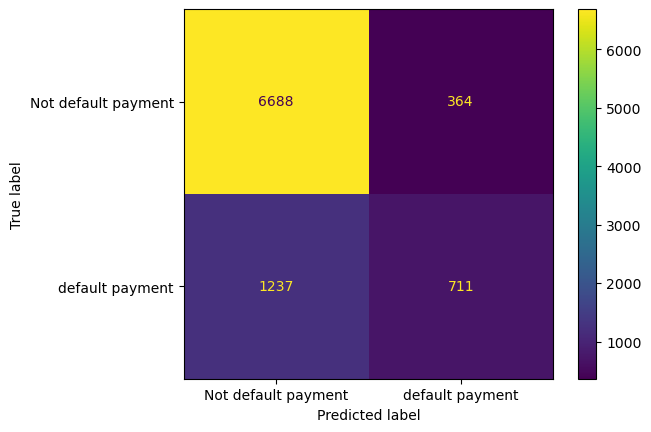

In [30]:
# Display the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test, values_format="d", display_labels=["Not default payment", "default payment"]
)

- The test score is 0.6789822444619797, which is good but not very high
- The test score agree with the validation score, so I think I don't have issues with optimization bias

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>


In [31]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)
    

In [33]:
# baseline model
results = {}
results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score = True, scoring = "f1_macro"
)

results["linear model"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, return_train_score = True, scoring = "f1_macro"
)

results["RBF SVM"] = mean_std_cross_val_scores(
    pipe_svm, X_train, y_train, return_train_score = True, scoring = "f1_macro")

results["Random Forest"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score = True, scoring = "f1_macro")

results["XGBoosting"] = mean_std_cross_val_scores(
    pipe_xgb, X_train, y_train, return_train_score = True, scoring = "f1_macro")



In [34]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.003 (+/- 0.002),0.003 (+/- 0.002),0.503 (+/- 0.009),0.500 (+/- 0.001)
linear model,0.142 (+/- 0.011),0.004 (+/- 0.000),0.629 (+/- 0.006),0.630 (+/- 0.005)
RBF SVM,4.397 (+/- 0.021),1.067 (+/- 0.006),0.675 (+/- 0.008),0.686 (+/- 0.002)
Random Forest,0.684 (+/- 0.042),0.036 (+/- 0.002),0.683 (+/- 0.008),0.999 (+/- 0.000)
XGBoosting,0.178 (+/- 0.005),0.006 (+/- 0.000),0.678 (+/- 0.007),0.845 (+/- 0.006)


## Concluding Mark

After firstly doing some preparation including data preprocessing and EDA, I applied baseline model, linear model (logistic regression), Random Forest, RBF SVM and XGBoosting. All other four models are better than baseline model. Among these four models, linear model (logistic regression) and RBF SVM are experiencing underfitting, Random forest are overfitting. So we pick the best model as XGBoosting. Then I perform hyperparameter tuning to get the best model leading to best validation score. Eventually, I use the chosen best model to evaluate test score and interpret the result. The final test score is 0.68, which is okay but not a very good score. Multiple other ideas can be applied to improve this score and the performance of our model.

## Discussion 

- More models could be applied with hyperparameter tuning to improve the validation scores, such as LightGBM, CatBoost, etc.
- Feature selection can be applied, since some explanatory variables are colinear and may influence the performance of the model.
- For hyperparameters optimization, I only tuned some basic parameters for XGBoosting, more parameters can be tuned to improve performance.

In [35]:
print("Using f1 score with macro average, the test score is", score)

Using f1 score with macro average, the test score is 0.6817482031274726
